# ДЗ по визуализации данных. Датасет - статистика NBA

In [1]:
import warnings
warnings.simplefilter('ignore')
%pylab inline

%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Загрузка, очистка и преобразование 3-х датасетов. Для визуализации будет использоваться 2 датасета: 
    - 'player_data.csv' (данный датасет будет совмещен с 'Players.csv');
    - 'Seasons_Stats.csv'

In [2]:
player_data_df = pd.read_csv('player_data.csv')
players_df = pd.read_csv('Players.csv')
seasons_df = pd.read_csv('Seasons_Stats.csv')

Очистка и преобразование 'Players.csv'

In [3]:
players_df.head(1)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN


In [4]:
players_df.drop(['Unnamed: 0', 'birth_city', 'birth_state', 'collage'], \
                axis=1, inplace=True, errors='ignore')
players_df.dropna(inplace=True)
players_df['height'] = players_df['height'].astype('int64')
players_df['weight'] = players_df['weight'].astype('int64')
players_df['born'] = players_df['born'].astype('int64')
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3921
Data columns (total 4 columns):
Player    3921 non-null object
height    3921 non-null int64
weight    3921 non-null int64
born      3921 non-null int64
dtypes: int64(3), object(1)
memory usage: 153.2+ KB


In [5]:
players_df.head(1)

,Player,height,weight,born
0,Curly Armstrong,180,77,1918


Очистка и преобразование 'player_data.csv'

In [6]:
player_data_df.head(1)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University


In [8]:
player_data_df.drop(['height', 'weight', 'birth_date', 'position'], axis=1, inplace=True, errors='ignore')
player_data_df.dropna(inplace=True)

In [9]:
player_data_df.head(1)

,name,year_start,year_end,college
0,Alaa Abdelnaby,1991,1995,Duke University


In [10]:
if 'height' not in  player_data_df.columns:
    player_data_df = player_data_df.merge(players_df[['height', 'weight', 'born']], \
                                          left_on='name', right_on=players_df['Player'])
player_data_df['career_dur'] = player_data_df['year_end'] - player_data_df['year_start'] + 1

In [11]:
player_data_df.head(1)

,name,year_start,year_end,college,height,weight,born,career_dur
0,Alaa Abdelnaby,1991,1995,Duke University,208,108,1968,5


Очистка и преобразование 'Seasons_Stats.csv'

In [12]:
seasons_df.head(1)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0


In [13]:
seasons_df = seasons_df[['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'FT%', 'AST', 'PF', 'PTS']]
seasons_df.dropna(inplace=True)
seasons_df['Year'] = seasons_df['Year'].astype('int64')
seasons_df['Age'] = seasons_df['Age'].astype('int64')
seasons_df['G'] = seasons_df['G'].astype('int64')
seasons_df['AST'] = seasons_df['AST'].astype('int64')
seasons_df['PF'] = seasons_df['PF'].astype('int64')
seasons_df['PTS'] = seasons_df['PTS'].astype('int64')
seasons_df.head()

,Year,Player,Pos,Age,Tm,G,FT%,AST,PF,PTS
0,1950,Curly Armstrong,G-F,31,FTW,63,0.705,176,217,458
1,1950,Cliff Barker,SG,29,INO,49,0.708,109,99,279
2,1950,Leo Barnhorst,SF,25,CHS,67,0.698,140,192,438
3,1950,Ed Bartels,F,24,TOT,15,0.559,20,29,63
4,1950,Ed Bartels,F,24,DNN,13,0.548,20,27,59


In [14]:
seasons_df.columns = ['Year', 'Player_name', 'Position', 'Age', 'Team',\
                      'Games', 'Free throws %', 'Assists', 'Personal Fouls', 'Points']

In [15]:
seasons_df.groupby('Position').count().sort_values('Points', ascending=False)

,Year,Player_name,Age,Team,Games,Free throws %,Assists,Personal Fouls,Points
Position,,,,,,,,,
PF,4798,4798,4798,4798,4798,4798,4798,4798,4798
SG,4661,4661,4661,4661,4661,4661,4661,4661,4661
C,4586,4586,4586,4586,4586,4586,4586,4586,4586
SF,4523,4523,4523,4523,4523,4523,4523,4523,4523
PG,4483,4483,4483,4483,4483,4483,4483,4483,4483
G,125,125,125,125,125,125,125,125,125
F,109,109,109,109,109,109,109,109,109
F-C,80,80,80,80,80,80,80,80,80
G-F,77,77,77,77,77,77,77,77,77


В баскетболе существует всего 5 позиций: PF, PG, SG, C, SF - необходимо отфильтровать позиции: убрать лишние, где у игрока несколько позиций - оставить одну.

In [16]:
positions = {'PF':'PF', 'SG':'SG', 'C':'C', 'SF':'SF', 'PG':'PG', 'G-F':None, 
             'F':None, 'G':None, 'F-C':'C', 'F-G':None, 'C-F':'C', 'PF-C':'PF', 
             'SF-SG':'SF', 'C-PF':'C', 'SG-SF':'SG', 'PF-SF':'PF', 'SF-PF':'SF', 
             'SG-PG':'SG', 'SF-PG':'SF', 'C-SF':'C', 'PG-SG':'PG', 'PG-SF':'PG', 
             'SG-PF':'SG'}

In [17]:
seasons_df['Position'] = seasons_df['Position'].map(positions)
seasons_df['Points_per_game'] = seasons_df['Points']/seasons_df['Games']
seasons_df.dropna(inplace=True)

In [18]:
seasons_df.head()

,Year,Player_name,Position,Age,Team,Games,Free throws %,Assists,Personal Fouls,Points,Points_per_game
1,1950,Cliff Barker,SG,29,INO,49,0.708,109,99,279,5.693878
2,1950,Leo Barnhorst,SF,25,CHS,67,0.698,140,192,438,6.537313
8,1950,Charlie Black,C,28,TOT,65,0.651,163,273,661,10.169231
9,1950,Charlie Black,C,28,FTW,36,0.632,75,140,382,10.611111
10,1950,Charlie Black,C,28,AND,29,0.688,88,133,279,9.620690


## 1) Распределение продолжительности спортивной карьеры среди игроков.

In [19]:
player_data_df.head(1)

,name,year_start,year_end,college,height,weight,born,career_dur
0,Alaa Abdelnaby,1991,1995,Duke University,208,108,1968,5


Text(0,0.5,'кол-во игроков')

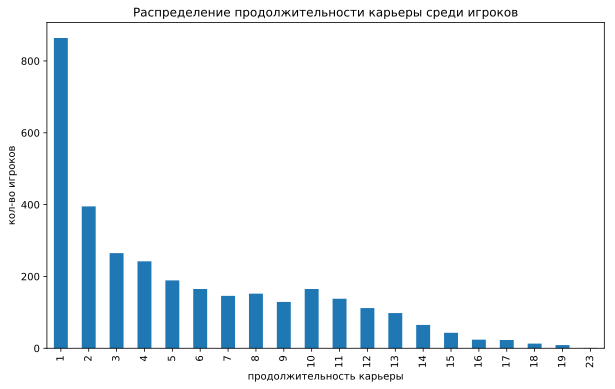

In [20]:
ax = player_data_df[player_data_df['year_end']<2018][['career_dur', 'name']].\
    groupby('career_dur').count().plot(kind='bar',figsize=(10,6), legend=False,\
    title='Распределение продолжительности карьеры среди игроков')

ax.set_xlabel("продолжительность карьеры")
ax.set_ylabel("кол-во игроков")

Как видно, абсолютное большинство игроков заканчивают баскетбольную карьеру в первый же год (поиграв только один сезон). Вероятно разочаровавшись или не потянув данный вид спорта. Также многие заканчивают карьеру менее, чем через 2-5 лет. Вероятнее всего играя в лиге во время обучения в институте-колледже. Карьера 6-10 лет приблизительно у равного кол-ва игроков. В это время игроки скорее всего чаще уходят из спорта из-за смены вида деятельности нежели из-за здоровья. И в интервале 10+ кол-во игроков постепенно снижается, что вероятно связано с возрастом и состоянием здоровья. 

## 2) Корреляция среднего количества фолов и очков у игрока за матч .

In [22]:
seasons_df.head(1)

,Year,Player_name,Position,Age,Team,Games,Free throws %,Assists,Personal Fouls,Points,Points_per_game
1,1950,Cliff Barker,SG,29,INO,49,0.708,109,99,279,5.693878


In [23]:
seasons_sum_df = seasons_df[['Player_name', 'Games', 'Assists', 'Personal Fouls', 'Points']].\
    groupby('Player_name').sum()
seasons_sum_df.head()

,Games,Assists,Personal Fouls,Points
Player_name,,,,
A.C. Green,1361,1469,2581,12928
A.J. English,151,320,287,1502
A.J. Guyton,78,145,58,442
A.J. Hammons,22,4,21,48
A.J. Price,282,607,247,1650


In [24]:
seasons_mean_df = pd.DataFrame()
for column in seasons_sum_df.columns[-3:]:
    seasons_mean_df[column] = seasons_sum_df[column]/seasons_sum_df['Games']
seasons_mean_df['Free throws %'] = seasons_df[['Player_name','Free throws %']].groupby('Player_name').mean()
seasons_mean_df.reset_index(inplace=True)

In [25]:
player_data_df.head(1)

,name,year_start,year_end,college,height,weight,born,career_dur
0,Alaa Abdelnaby,1991,1995,Duke University,208,108,1968,5


In [26]:
seasons_mean_df.columns

Index(['Player_name', 'Assists', 'Personal Fouls', 'Points', 'Free throws %'], dtype='object')

In [27]:
player_data_df = player_data_df.merge(
    seasons_mean_df[['Assists', 'Personal Fouls', 'Points', 'Free throws %']],
    left_on='name', right_on=seasons_mean_df['Player_name'])
player_data_df = player_data_df.rename(columns = {'Assists': 'Assists/match', 
                                                  'Personal Fouls': 'Personal_Fouls/match', 
                                                  'Points': 'Points/match'})

In [28]:
player_data_df.head(1)

,name,year_start,year_end,college,height,weight,born,career_dur,Assists/match,Personal_Fouls/match,Points/match,Free throws %
0,Alaa Abdelnaby,1991,1995,Duke University,208,108,1968,5,0.327225,2.028796,6.013089,0.671375


Text(0.5,0.98,'Personal faults per match and points per match correlation')

<Figure size 1080x864 with 0 Axes>

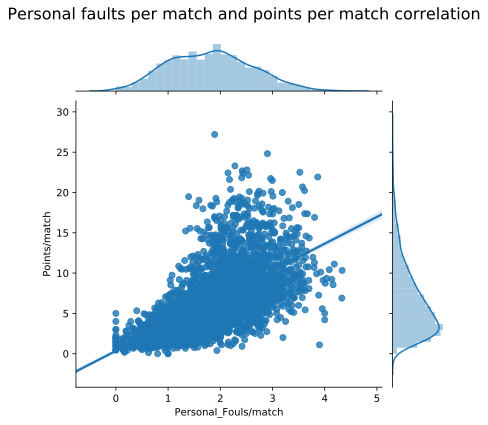

In [30]:
plt.figure(figsize=(15,12))
g = sns.jointplot(x='Personal_Fouls/match', y='Points/match', 
              data=player_data_df, kind='reg')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Personal faults per match and points per match correlation', fontsize=16)

Как видно из графика есть определенная прямая корреляция между средним количеством очков за матч и средним количество фолов за матч у одного игрока. Т.к., чем более активен игрок, тем больше он забивает, но и тем чаще он фолит.

## 3) Средний рост игрока в разные годы

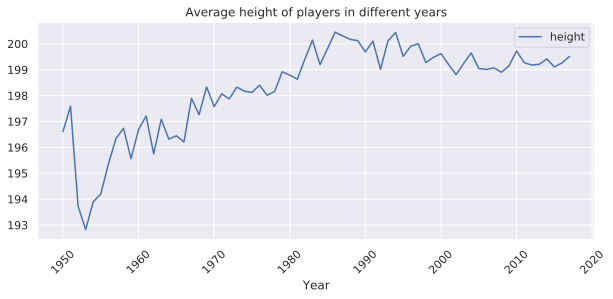

In [35]:
seasons_df = seasons_df.merge(
    player_data_df[['height']], left_on='Player_name',
    right_on=player_data_df['name'])

seasons_df[['Year', 'height']].groupby('Year').mean().\
    plot(kind='line', rot=45, figsize=(10,4), title='Average height of players in different years')

Как видно из распределения - начало 50-х несколько выбивается из общего графика, что возможно связано с недостаточными статистическими данными, либо малочисленностью лиги. Начиная с 1953 года наблюдается довольно быстрое увеличение роста влоть до 1957 года, откуда далее средний рост продолжает постепенно увеличиваться вплоть до середины 80-х. Далее средний рост вплоть до наших дней остается приблизительно на одном уровне.
В целом же видно, что большую часть истории лиги средний рост постепенно увеличивался, т.к. хорошо известно, что этот показатель дает большие преимущества в игре. Также известно, что средний рост всех людей со временем также увеличивался, что также могло оказать влияние на рост игроков лиги NBA. Последние 30 лет рост остается приблизительно на одном уровне, достигнув оптимального предела.

## 4)  Сравнение результативности реализации свободного броска в зависимости от позиции игрока

In [38]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [39]:
seasons_df.head()

,Year,Player_name,Position,Age,Team,Games,Free throws %,Assists,Personal Fouls,Points,Points_per_game,height
0,1950,Cliff Barker,SG,29,INO,49,0.708,109,99,279,5.693878,188
1,1951,Cliff Barker,SG,30,INO,56,0.649,115,98,152,2.714286,188
2,1952,Cliff Barker,SG,31,INO,44,0.588,70,56,126,2.863636,188
3,1950,Leo Barnhorst,SF,25,CHS,67,0.698,140,192,438,6.537313,193
4,1951,Leo Barnhorst,SF,26,INO,68,0.689,218,197,546,8.029412,193


In [40]:
data = []

for position in seasons_df['Position'].unique():
    data.append(
        go.Box(y=seasons_df[seasons_df['Position']==position]['Free throws %']*100, 
               name=position)
    )

In [41]:
data

[Box({
     'name': 'SG', 'y': array([70.8, 64.9, 58.8, ..., 50. , 66.7, 77.8])
 }), Box({
     'name': 'SF', 'y': array([69.8, 68.9, 65.2, ..., 65.6, 60. , 85.7])
 }), Box({
     'name': 'C', 'y': array([ 65.1,  63.2,  68.8, ...,  54.4, 100. ,  60. ])
 }), Box({
     'name': 'PG', 'y': array([62.6, 55.7, 59.3, ..., 77.5, 81.8, 80.5])
 }), Box({
     'name': 'PF', 'y': array([69. , 62.6, 59.5, ..., 71.4, 90.9, 50. ])
 })]

In [42]:
iplot(data, show_link = False)

Бокс плоты результативности реализации свободного броска у разных позиций хорошо отображает их роли в команде:

PG - разыгравающий защитник, участвует в розыгрыше комбинаций. От игрока требуется хорошое владение мячом и высокая скорость перемещения, также обычно они реализуют длинные броски (т.е. являются отличными снайперами). Что хорошо видно на графике: высокая медианная результативность и узкий интерквартильный размах. 
SG - атакующий защитник завершает атаки и опекает опасных соперников. От них требуется меткость и быстрый дриблинг и скорость. Также являются одними из лучших снайперов, что подтверждает график: высокая медианная результативность и узкий интерквартильный размах.
SF - легкий форвар, основная задача – набор очков. Самые универсальные игроки на поле, соответственно имеют среднюю результативность и не сильно отстают в меткости от PG и SG. 
C - центровой - самый высокий и мощный игрок в команде, который участвует в борьбе в воздухе, под кольцом. По графику видно, что игроки данной позиции имеют наихудшую медианную результативность и самый широкий интерквартильный размах, т.к. основная задача у них забивать из под кольца, а не с дистанции.
PF - тяжелый или мощный форвард, основная задача подбор мяча в нападении и защите. Также как и центровые не отличается результативностью (на втором месте с конца). Т.к. их роли также схожи с центровыми.

## 5)  Сравнение распределения роста игроков для каждой позиции

In [43]:
seasons_df.head()

,Year,Player_name,Position,Age,Team,Games,Free throws %,Assists,Personal Fouls,Points,Points_per_game,height
0,1950,Cliff Barker,SG,29,INO,49,0.708,109,99,279,5.693878,188
1,1951,Cliff Barker,SG,30,INO,56,0.649,115,98,152,2.714286,188
2,1952,Cliff Barker,SG,31,INO,44,0.588,70,56,126,2.863636,188
3,1950,Leo Barnhorst,SF,25,CHS,67,0.698,140,192,438,6.537313,193
4,1951,Leo Barnhorst,SF,26,INO,68,0.689,218,197,546,8.029412,193


In [44]:
traces = []
for position in ['SG', 'SF', 'C', 'PG', 'PF']:
    traces.append(
        go.Histogram(
            x=seasons_df[seasons_df['Position'] == position]['height'],
            xbins=dict(
                start=160,
                end=230,
                size= 3),
            autobinx = False,
            histnorm='probability', 
            name = position, 
            visible = (position == 'SG'))
    )
    
layout = go.Layout(
    title='Player hight disrtribution',
    updatemenus=list([
        dict(
            x=1,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True] + [False]*4],
                    label='SG',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False] + [True] + [False]*3],
                    label='SF',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*2 + [True] + [False]*2],
                    label='C',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*3 + [True] + [False]],
                    label='PG',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*4 + [True]],
                    label='PF',
                    method='restyle'
                )
            ]),
        )
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

Распределение роста игроков разных позиций хорошо отображает их роли в команде:<br>
PG - разыгравающий защитник, участвует в розыгрыше комбинаций. От игрока требуется хорошое владение мячом и высокая скорость перемещения, поэтому это обычно самые низкие игроки, что подтверждает распределение. Рост основной части игроков при этом лежит в широком диапозоне 178-198 мм.<br>
SG - атакующий защитник завершает атаки и опекает опасных соперников. От них требуется меткость и быстрый дриблинг и скорость, поэтому это одни из самых низких игроков. Рост широко варьируется, но есть ярко выраженный максимум 196-198 мм.<br>
SF - легкий форвар, основная задача – набор очков. В отличие от защитников, игроки нападения обладают более высоким ростом и, следовательно, лучше подбирают мяч и блокируют броски. Рост находится в широком диапазоне 196-207 мм.<br>
PF - тяжелый или мощный форвард, основная задача подбор мяча в нападении и защите. Поэтому мощные форварды должны обладать незаурядной физической силой и выносливостью, но также от них требуется и скорость. Это обычно вторые по высоте игроки после центровых. Рост лежит в широком диапазоне 196-213 мм.<br>
C - центровой - самый высокий и мощный игрок в команде, который участвует в борьбе в воздухе, под кольцом. Также по распрелению видно, что у распределения роста ярко выраженный пик и основная часть игроков этой позиции имеет рост в узком диапазоне 205-213 мм с ярко выраженным пиком.<br>
